<a href="https://colab.research.google.com/github/hammedb197/detectron_u/blob/master/layout_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [11]:
%cd My\ Drive

/gdrive/My Drive


In [3]:
%mkdir  layout_analysis_p

mkdir: cannot create directory ‘layout_analysis_p’: File exists


In [12]:
%cd  layout_analysis_p

/gdrive/My Drive/layout_analysis_p


In [8]:
!ls

 Base-RCNN-C4.yaml
 Base-RCNN-DilatedC5.yaml
 Base-RCNN-FPN.yaml
 Base-RetinaNet.yaml
 detectron2_repo
 DLA_mask_rcnn_R_101_FPN_3x.yaml
 DLA_mask_rcnn_R_50_FPN_3x.yaml
 DLA_mask_rcnn_X_101_32x8d_FPN_3x.yaml
 form1053.jpg
 form10810.jpg
 input.jpg
'list_[ 11.78985 304.07697 754.      349.77808].png'
'list_[ 11.85891 356.0659  754.      402.77567].png'
'list_[ 11.946924 846.3144   754.       894.04956 ].png'
'list_[ 11.998956 325.3983   754.       372.79    ].png'
'list_[ 12.028438 190.59798  754.       236.55376 ].png'
'list_[ 12.079636 288.52567  754.       334.3934  ].png'
'list_[ 12.129481 228.09546  754.       274.70227 ].png'
'list_[ 12.156404 537.68384  754.       583.2721  ].png'
'list_[ 12.167909 477.85822  754.       523.33844 ].png'
'list_[ 12.184706 673.7392   754.       719.50073 ].png'
'list_[ 12.206767 151.36235  754.       192.60396 ].png'
'list_[ 12.24344 462.19913 754.      508.10135].png'
'list_[ 12.248847 416.14166  754.       463.23654 ].png'
'list_[ 12.338702 695.37

In [17]:
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.4.0)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.5.0)
Requirement already up-to-date: cython in /usr/local/lib/python3.6/dist-packages (0.29.16)
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-n4eufcv5
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-n4eufcv5
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-r69mkhlu
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-r69mkhlu
  Created wheel for fvcore: filename=fvcore-0.1-cp36-none-any.whl size=42662 sha256=39de7a2a0acf071db22b56cfa620ffe8e85651ce2c50271c00efe2b81f7e1b38
  Stored in directory: /tmp/pip-ephem-wheel-cache-ehnztu4i/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-lin

In [14]:
!pip install detectron2

In [0]:
# basic libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# detectron2 utilities
# import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

from detectron2.data.datasets import register_coco_instances

In [0]:
import detectron2

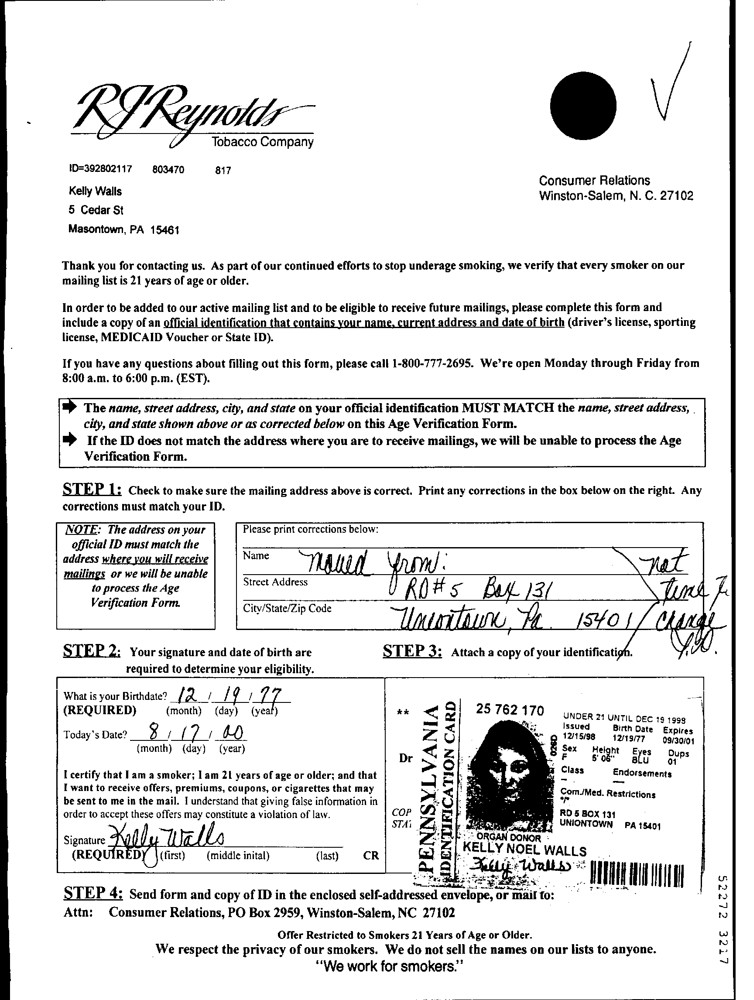

In [42]:
im = cv2.imread("form1053.jpg")
#  form1053.jpg
#  form10810.jpg
cv2_imshow(im)

In [20]:
!ls 

 Base-RCNN-C4.yaml
 Base-RCNN-DilatedC5.yaml
 Base-RCNN-FPN.yaml
 Base-RetinaNet.yaml
 detectron2_repo
 DLA_mask_rcnn_R_101_FPN_3x.yaml
 DLA_mask_rcnn_R_50_FPN_3x.yaml
 DLA_mask_rcnn_X_101_32x8d_FPN_3x.yaml
 form1053.jpg
 form10810.jpg
 input.jpg
'model (1).yaml'
 model.yaml
'text_[325.42862   25.860685 687.9125    52.487007].png'


In [0]:
im

In [77]:
cfg = get_cfg()
# add_densepose_config(cfg)
 
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file("DLA_mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"



WARNING [04/14 20:47:56 d2.config.compat]: Config 'DLA_mask_rcnn_R_50_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [78]:
# boxes = outputs['instances'].pred_boxes.tensor.cpu().numpy()[0]
classes = ['text', 'title', 'list', 'table', 'figure']
default_predictor = detectron2.engine.defaults.DefaultPredictor(cfg)



'roi_heads.box_predictor.cls_score.weight' has shape (81, 1024) in the checkpoint but (6, 1024) in the model! Skipped.
'roi_heads.box_predictor.cls_score.bias' has shape (81,) in the checkpoint but (6,) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.weight' has shape (320, 1024) in the checkpoint but (20, 1024) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.bias' has shape (320,) in the checkpoint but (20,) in the model! Skipped.
'roi_heads.mask_head.predictor.weight' has shape (80, 256, 1, 1) in the checkpoint but (5, 256, 1, 1) in the model! Skipped.
'roi_heads.mask_head.predictor.bias' has shape (80,) in the checkpoint but (5,) in the model! Skipped.


In [0]:
img = detectron2.data.detection_utils.read_image("form1053.jpg", format="BGR")
predictions = default_predictor(img)
instances = predictions["instances"].to('cpu')

In [0]:
predictions 

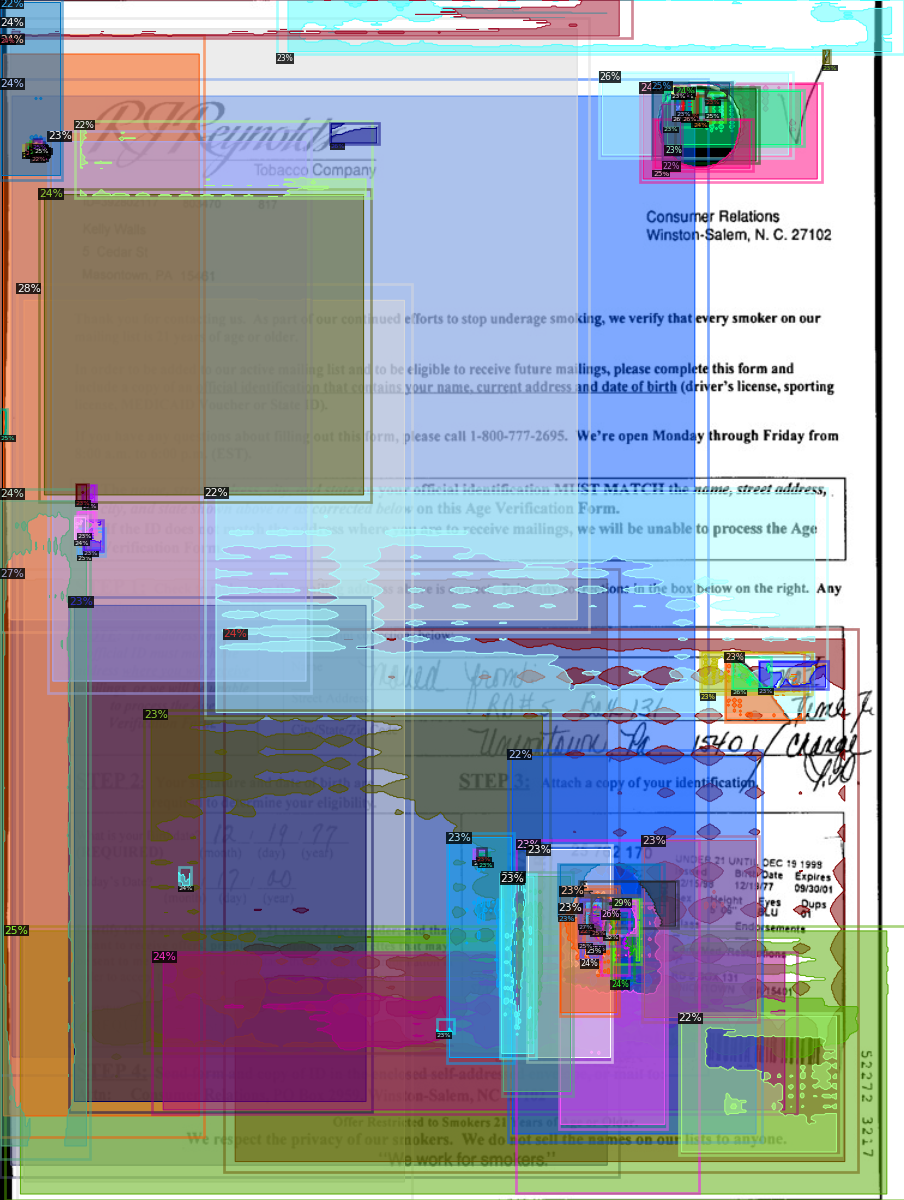

In [86]:
### uncomment the below script in case you want to see the detector visualisations
    
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TEST[0]), scale=1.2)
v = v.draw_instance_predictions(predictions["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])
    

['list', 'list', 'text', 'list', 'list', 'text', 'list', 'title', 'title', 'title', 'figure', 'figure', 'figure', 'figure', 'list', 'figure', 'title', 'figure', 'figure', 'list', 'list', 'list', 'figure', 'list', 'list', 'figure', 'figure', 'figure', 'list', 'title', 'title', 'figure', 'figure', 'text', 'figure', 'title', 'list', 'figure', 'text', 'title', 'list', 'title', 'list', 'text', 'text', 'figure', 'title', 'list', 'figure', 'title', 'figure', 'figure', 'list', 'text', 'figure', 'list', 'text', 'title', 'figure', 'text', 'text', 'list', 'figure', 'list', 'text', 'title', 'title', 'title', 'text', 'text', 'list', 'text', 'figure', 'title', 'text', 'text', 'figure', 'figure', 'list', 'list', 'list', 'text', 'text', 'list', 'text', 'list', 'figure', 'figure', 'list', 'list', 'text', 'title', 'list', 'text', 'list', 'list', 'title', 'text', 'title', 'list']
list


list


text


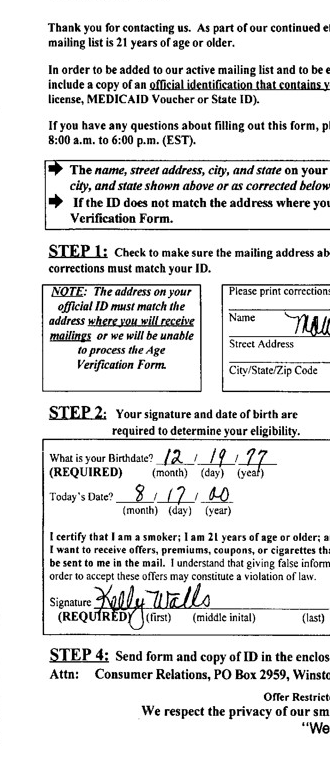

list


list


text


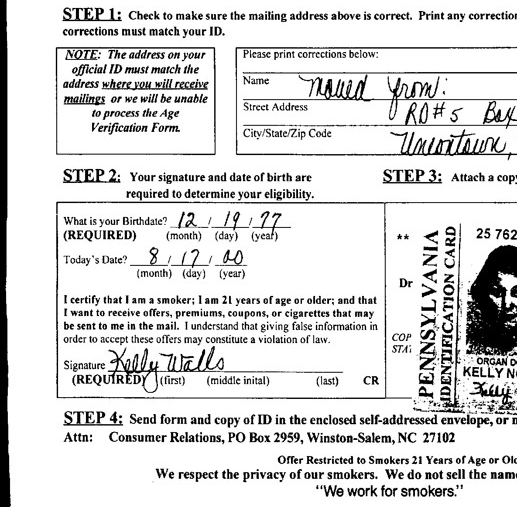

list


title


title


title


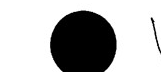

figure


figure


figure


figure


list


figure


title


figure


figure


list


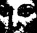

list


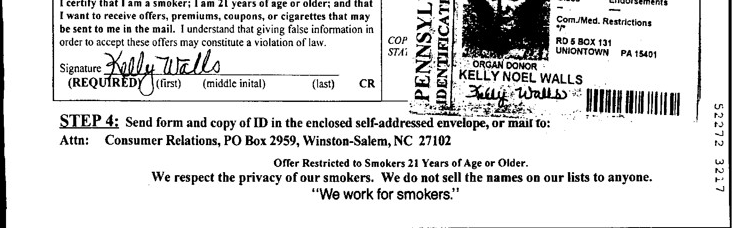

list


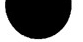

figure


list


list


figure


figure


figure


list


title


title


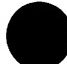

figure


figure


text


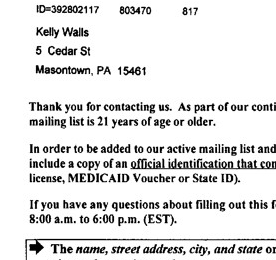

figure


title


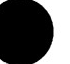

list


figure


text


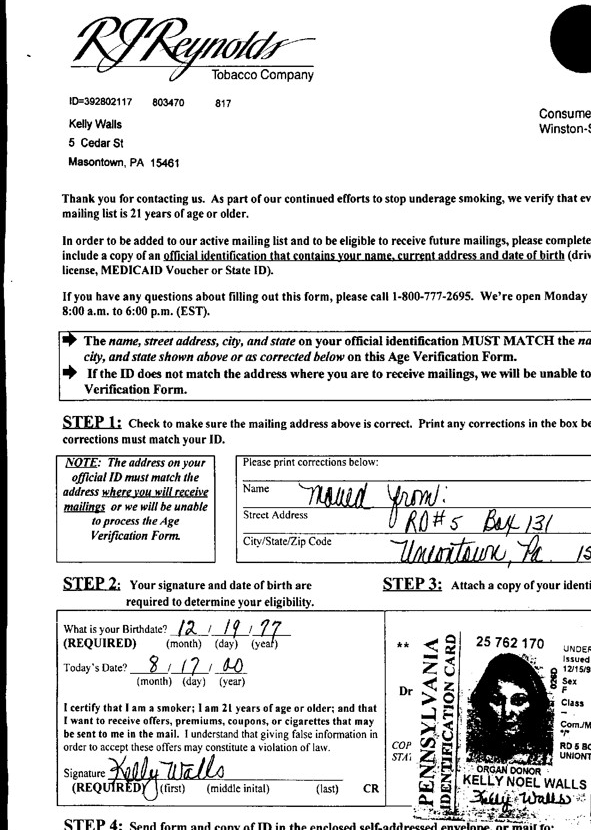

title


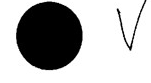

list


title


list


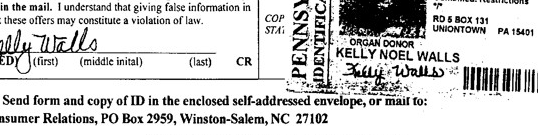

text


text


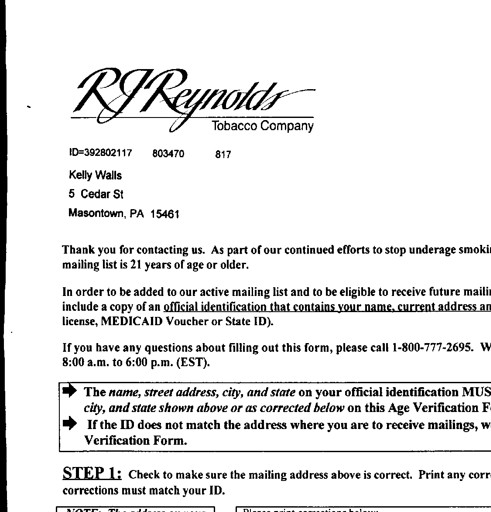

figure


title


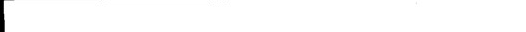

list


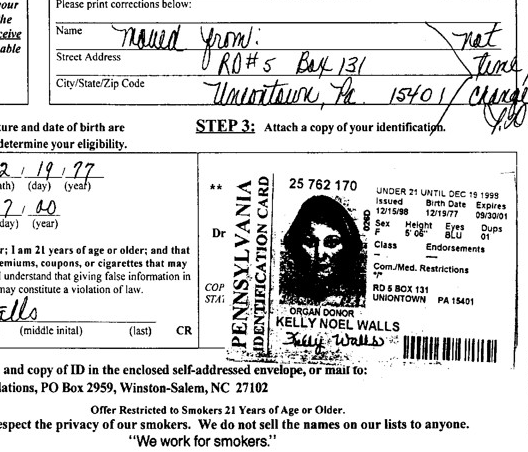

figure


title


figure


figure


list


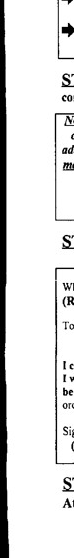

text


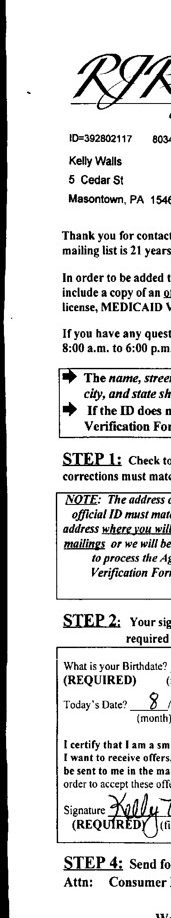

figure


list


text


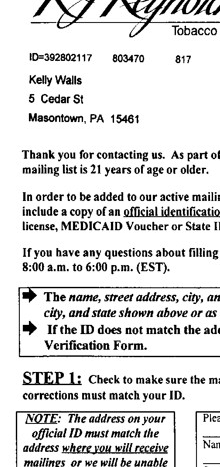

title


figure


text


text


list


figure


list


text


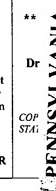

title


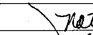

title


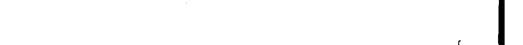

title


text


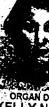

text


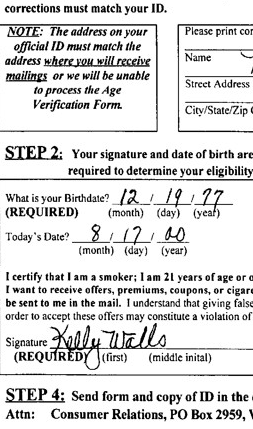

list


text


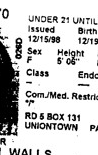

figure


title


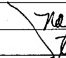

text


text


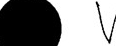

figure


figure


list


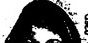

list


list


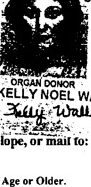

text


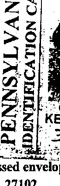

text


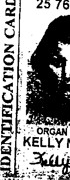

list


text


list


figure


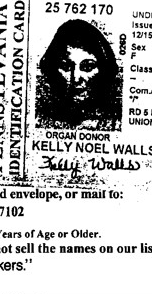

figure


list


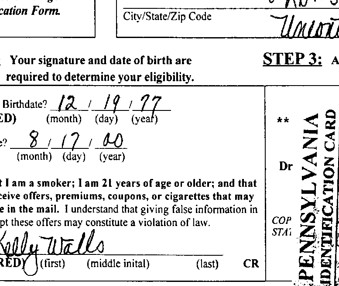

list


text


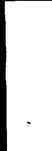

title


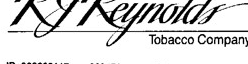

list


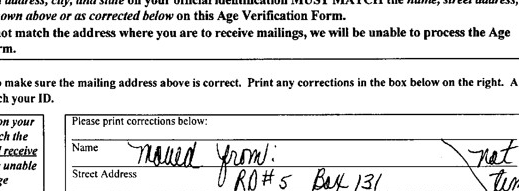

text


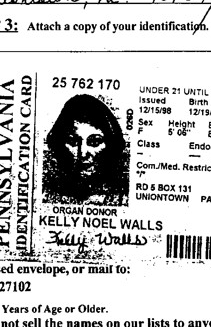

list


list


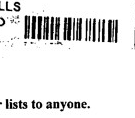

title


text


title


list


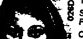

In [90]:

pred_classes = instances.pred_classes
labels = [classes[i] for i in pred_classes]
print(labels)
boxes = instances.pred_boxes
if isinstance(boxes, detectron2.structures.boxes.Boxes):
    boxes = boxes.tensor.numpy()
else:
    boxes = np.asarray(boxes)

from PIL import Image
import math
for label, bbox in zip(labels, boxes):
     
    # getting prediction bboxes from model outputs
    
    x2 = math.ceil(bbox[0])
    x1 = math.ceil(bbox[1])
    y2 = math.ceil(bbox[2])
    y1 = math.ceil(bbox[3])
    crop_img = img[x1:y1,x2:y2]
    #crop_img = cv2.resize(crop_img, (500,250))
    
    # showing original image
    print(label)
    cv2_imshow(crop_img)


        # croppped_img.save(f"{label}_{bbox}.png")

'My Drive'
